# model 1



In [1]:
# Packages

import sys
import os
# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))
# Import module
from XGBoost_Functions import *
# Model name
model_name = 'include_previous_rating_model_1'
import json

In [2]:
# Load the data
df = load_data()

In [3]:
# Get the column names and mapping
numeric_feature_columns, cat_feature_columns, target_column, custom_mapping = get_column_names_and_mapping(model_name)

In [4]:
# Create matrices
X_train_scaled, X_test_scaled, y_train, y_test, _ = prepare_matrices(df, numeric_feature_columns, cat_feature_columns, target_column, custom_mapping, change=False)


feature names: 
['num__Altman_Z' 'num__Altman_Z_diff']


In [6]:
# Train model
best_model = train_model_with_grid_search(X_train_scaled, y_train,len(custom_mapping), model_name)

Tuned hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'multi:softprob'}
Train accuracy of best model:  0.947464180122811
Best mean CV accuracy: 0.9474643189574931


<AxesSubplot: >

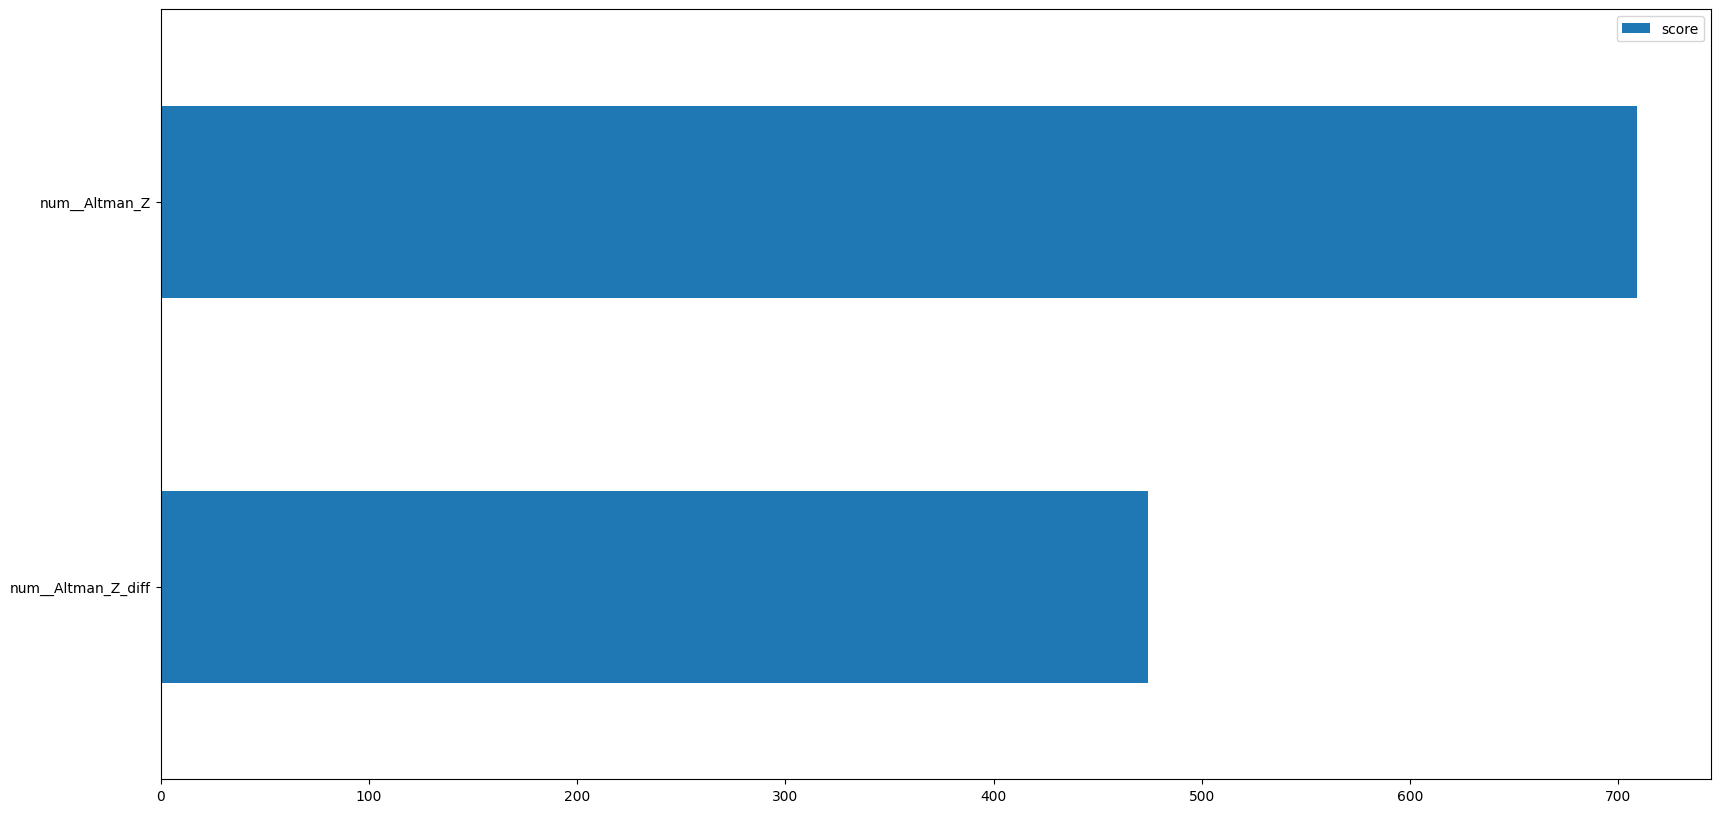

In [32]:
feature_important = best_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=_, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh', figsize = (20,10)) ## plot top 40 features

{'accuracy': 0.9496336996336996, 'f1_score': 0.9251011240208046, 'majority_baseline': 0.9496336996336996}
Share of predictions exactly as the actual: 94.96%
Share of predictions 1 or fewer ratings away from actual: 100.00%


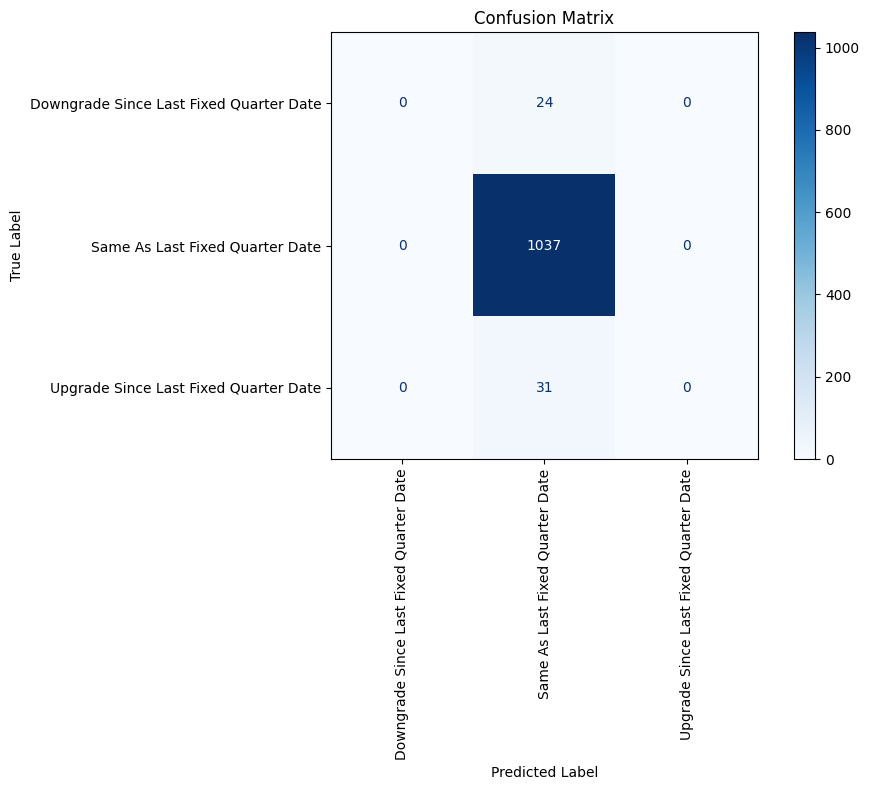

In [7]:
# Evaluate model
evaluate_model(best_model, X_test_scaled, y_test, custom_mapping,model_name)

In [8]:
# Get predictions
get_model_predictions(best_model, X_test_scaled, y_test, custom_mapping, model_name, target_column, df)

X_test_scaled shape
(1092, 2)
y_test shape
(1092,)
accuracy: 0.9496336996336996
share of correct predictions: 0.9496336996336996
assertion that they match:


In [ ]:
# plot important features
plot_importance(best_model,_,model_name)